# <center>Modelling Report</center>

**Architecture**

The network used in this project is YOLOv5 Small network. The reason we are using small but not middle or large is that the small provides better result (approximately 0.01 accuracy increased). This is probably because that crater detections do not need too much parameters. Same model is used for Mars and Moon, but with different weights. The Mars model is trained directly with the data, while the Moon data need to be cut into numerous images with size 416 * 416 and then sent to the training program. 

**Hyperparameter**

Pre-train model: We tried a variety of pre-trained models, yolov5s/yolov5m/yolov5l, and theoretically the larger the model the better it should perform, and the smaller the model the faster it should train. In practice, yolov5s did train faster, but yolov5l did not show better results. We therefore chose to use yolov5s as our pre-training model.

Optimisers: We experimented with a variety of optimisers, trying both SGD, and Adam, with Adam performing better on our dataset.

Learning rate: The learning rate is the magnitude of how much the network weights are updated in the optimization algorithm. However, adjusting the learning rate is often more useful when the model is unable to learn the features. We tried to adjust the learning rate during this training but did not get better results.

batch size: The batch size is the number of samples fed into the model for each training session of the neural network. We used colab for this training, so we used a larger batch size (32).

Epoch: We set the maximum number of iterations to 128 and we got the best results at epoch 25.

**Training workflow and evidence**

Look at below.

# yolov5 training and testing
For faster training, we stored the yolov5 code as a whole on Google Drive and used colab for training.

# Go to path
Go to our path and check it.

We need to update colab python for our training.

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/yolov5/

/content/drive/MyDrive/yolov5


In [6]:
!pip install -U pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train
use this code to train our model, and we save our model and reult in the google drive.

First we connect to the visualisation platform CLEARML.

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=Q77SVS9MRYK7RQMC906T
%env CLEARML_API_SECRET_KEY=vzW4nECWiLxM6j12yAhVkdOra3DjoA5PL09LVE3oThykDulpS1

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=Q77SVS9MRYK7RQMC906T
env: CLEARML_API_SECRET_KEY=vzW4nECWiLxM6j12yAhVkdOra3DjoA5PL09LVE3oThykDulpS1


In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

**Train for the moon data yolov5_s and save period.**

In [ ]:
!python train.py --img 416 --batch 32 --epochs 128 --data ../yolov5/data/moon.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --save-period 16

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.2 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../yolov5/data/moon.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=128, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=16, seed=0, l

**Train for mars data.**

In [ ]:
!python train.py --img 416 --batch 32 --epochs 64 --data ../yolov5/data/mars.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --cache --save-period 16

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=../yolov5/data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=64, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=16, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

**Try a number of different models, here yolov5l is used.**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 32 --data ../yolov5/data/mars.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=models/yolov5l.yaml, data=../yolov5/data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=32, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirement "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command

# Test
Get an image from our data and try to get the result and save, you can see the save path below.

In [7]:
!python detect.py --weights ../yolov5/runs/train/exp14/weights/best.pt --img 416 --conf 0.25 --source ../dataset/images/val/

detect: weights=['../yolov5/runs/train/exp14/weights/best.pt'], source=../dataset/images/val/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.1 MB/s eta 0:00:00

requirements: 2 packages updated per /content/drive/MyDrive/yolov5/requirements.t

**Cut up Friday's lunar data for testing.**

In [ ]:
!python detect.py --weights ../yolov5/runs/train/exp21/weights/best.pt --img 640 --conf 0.25 --source ../image_data/

Justification


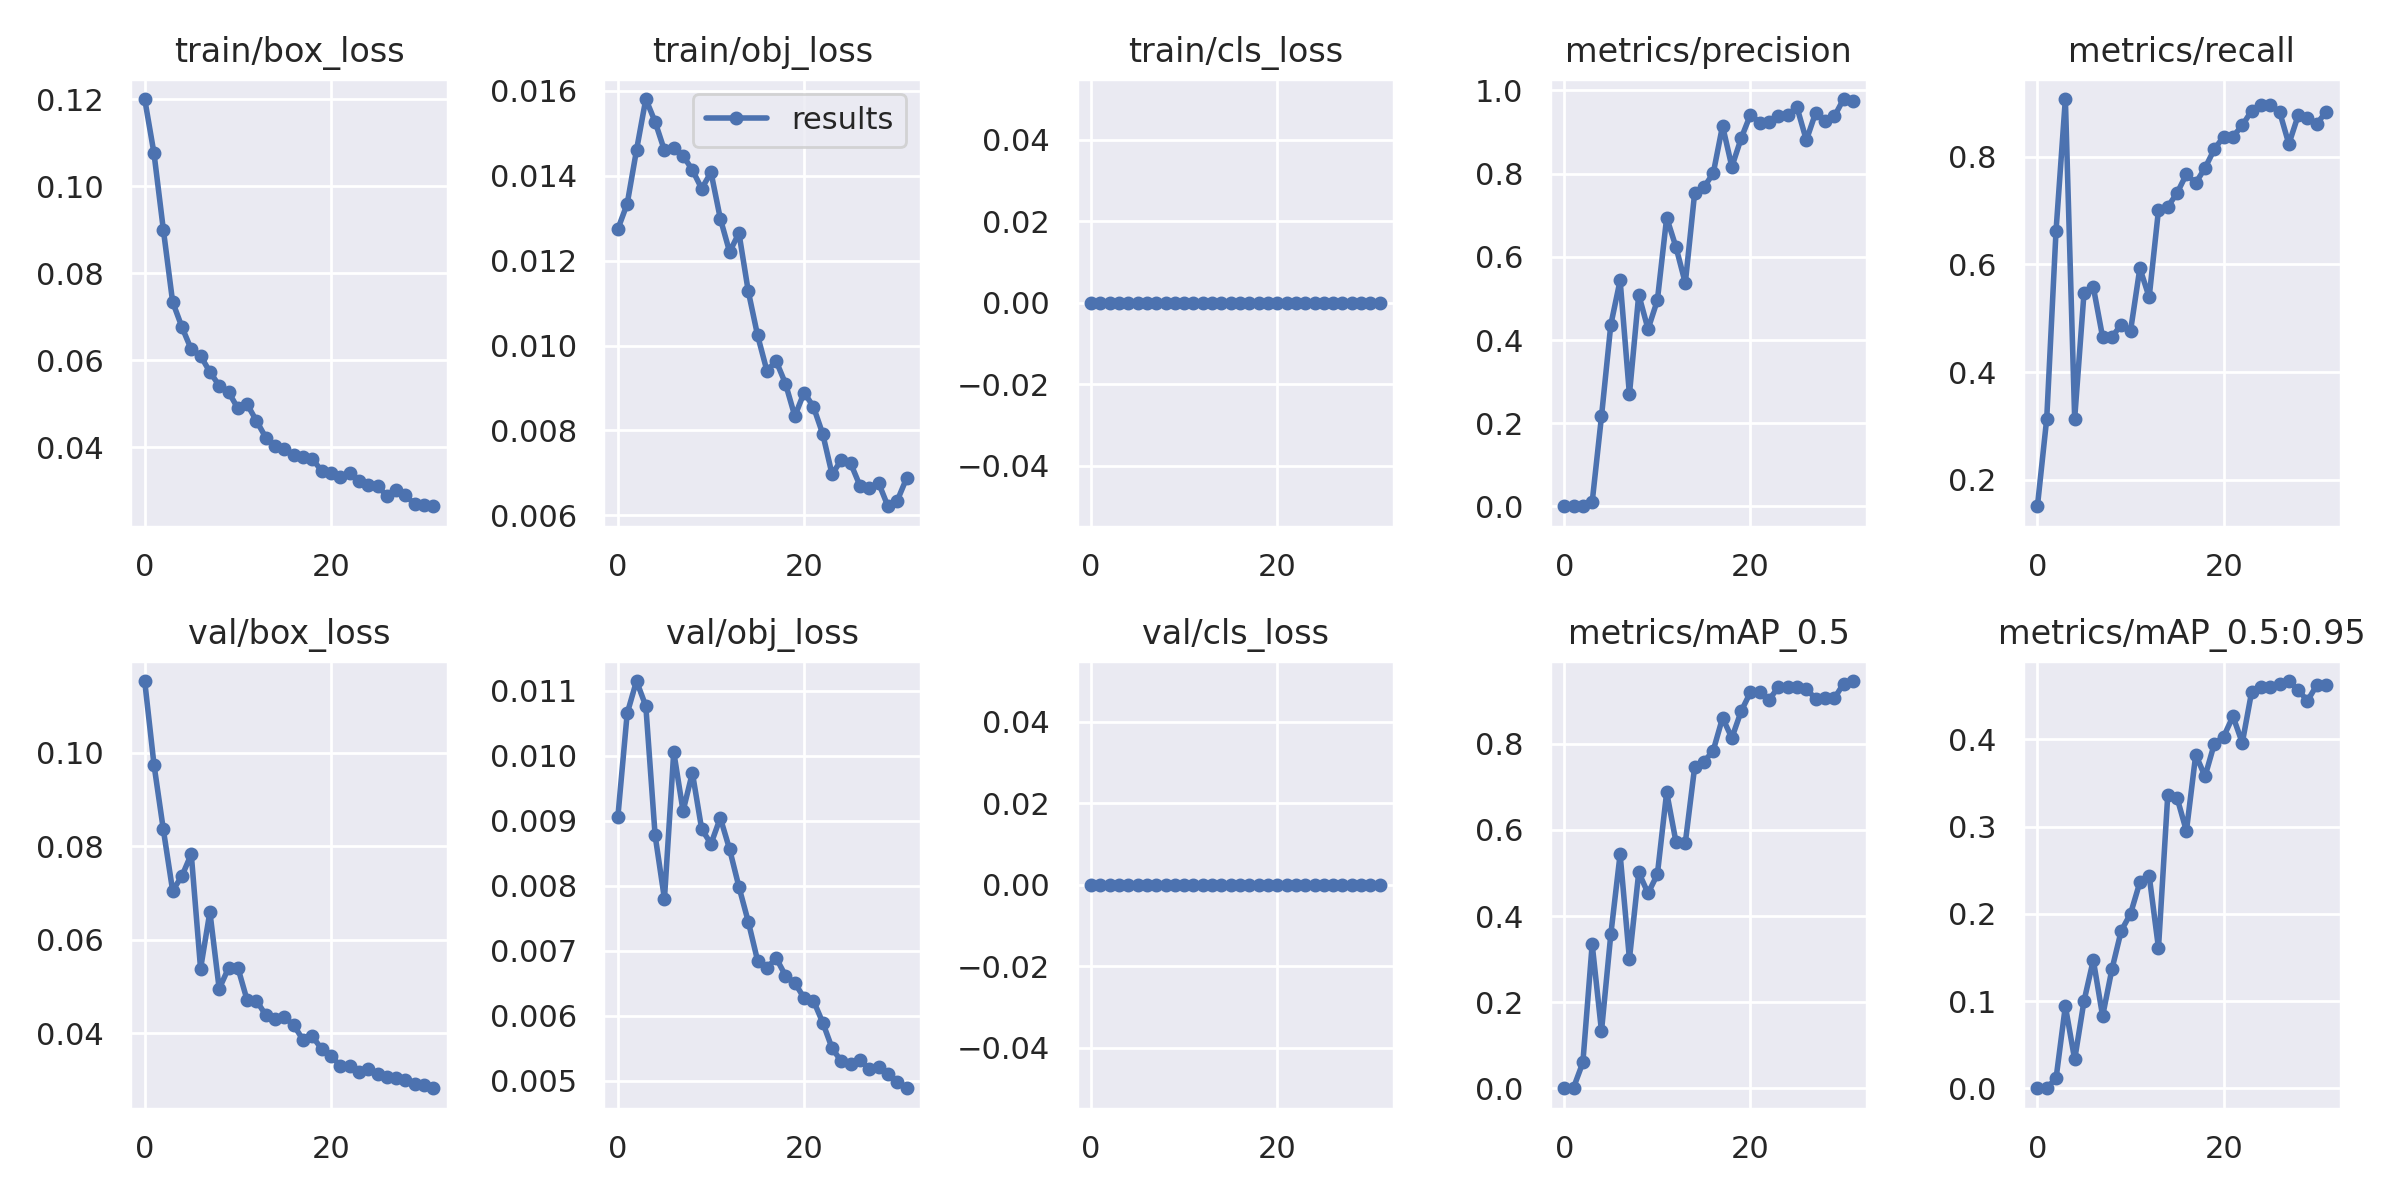



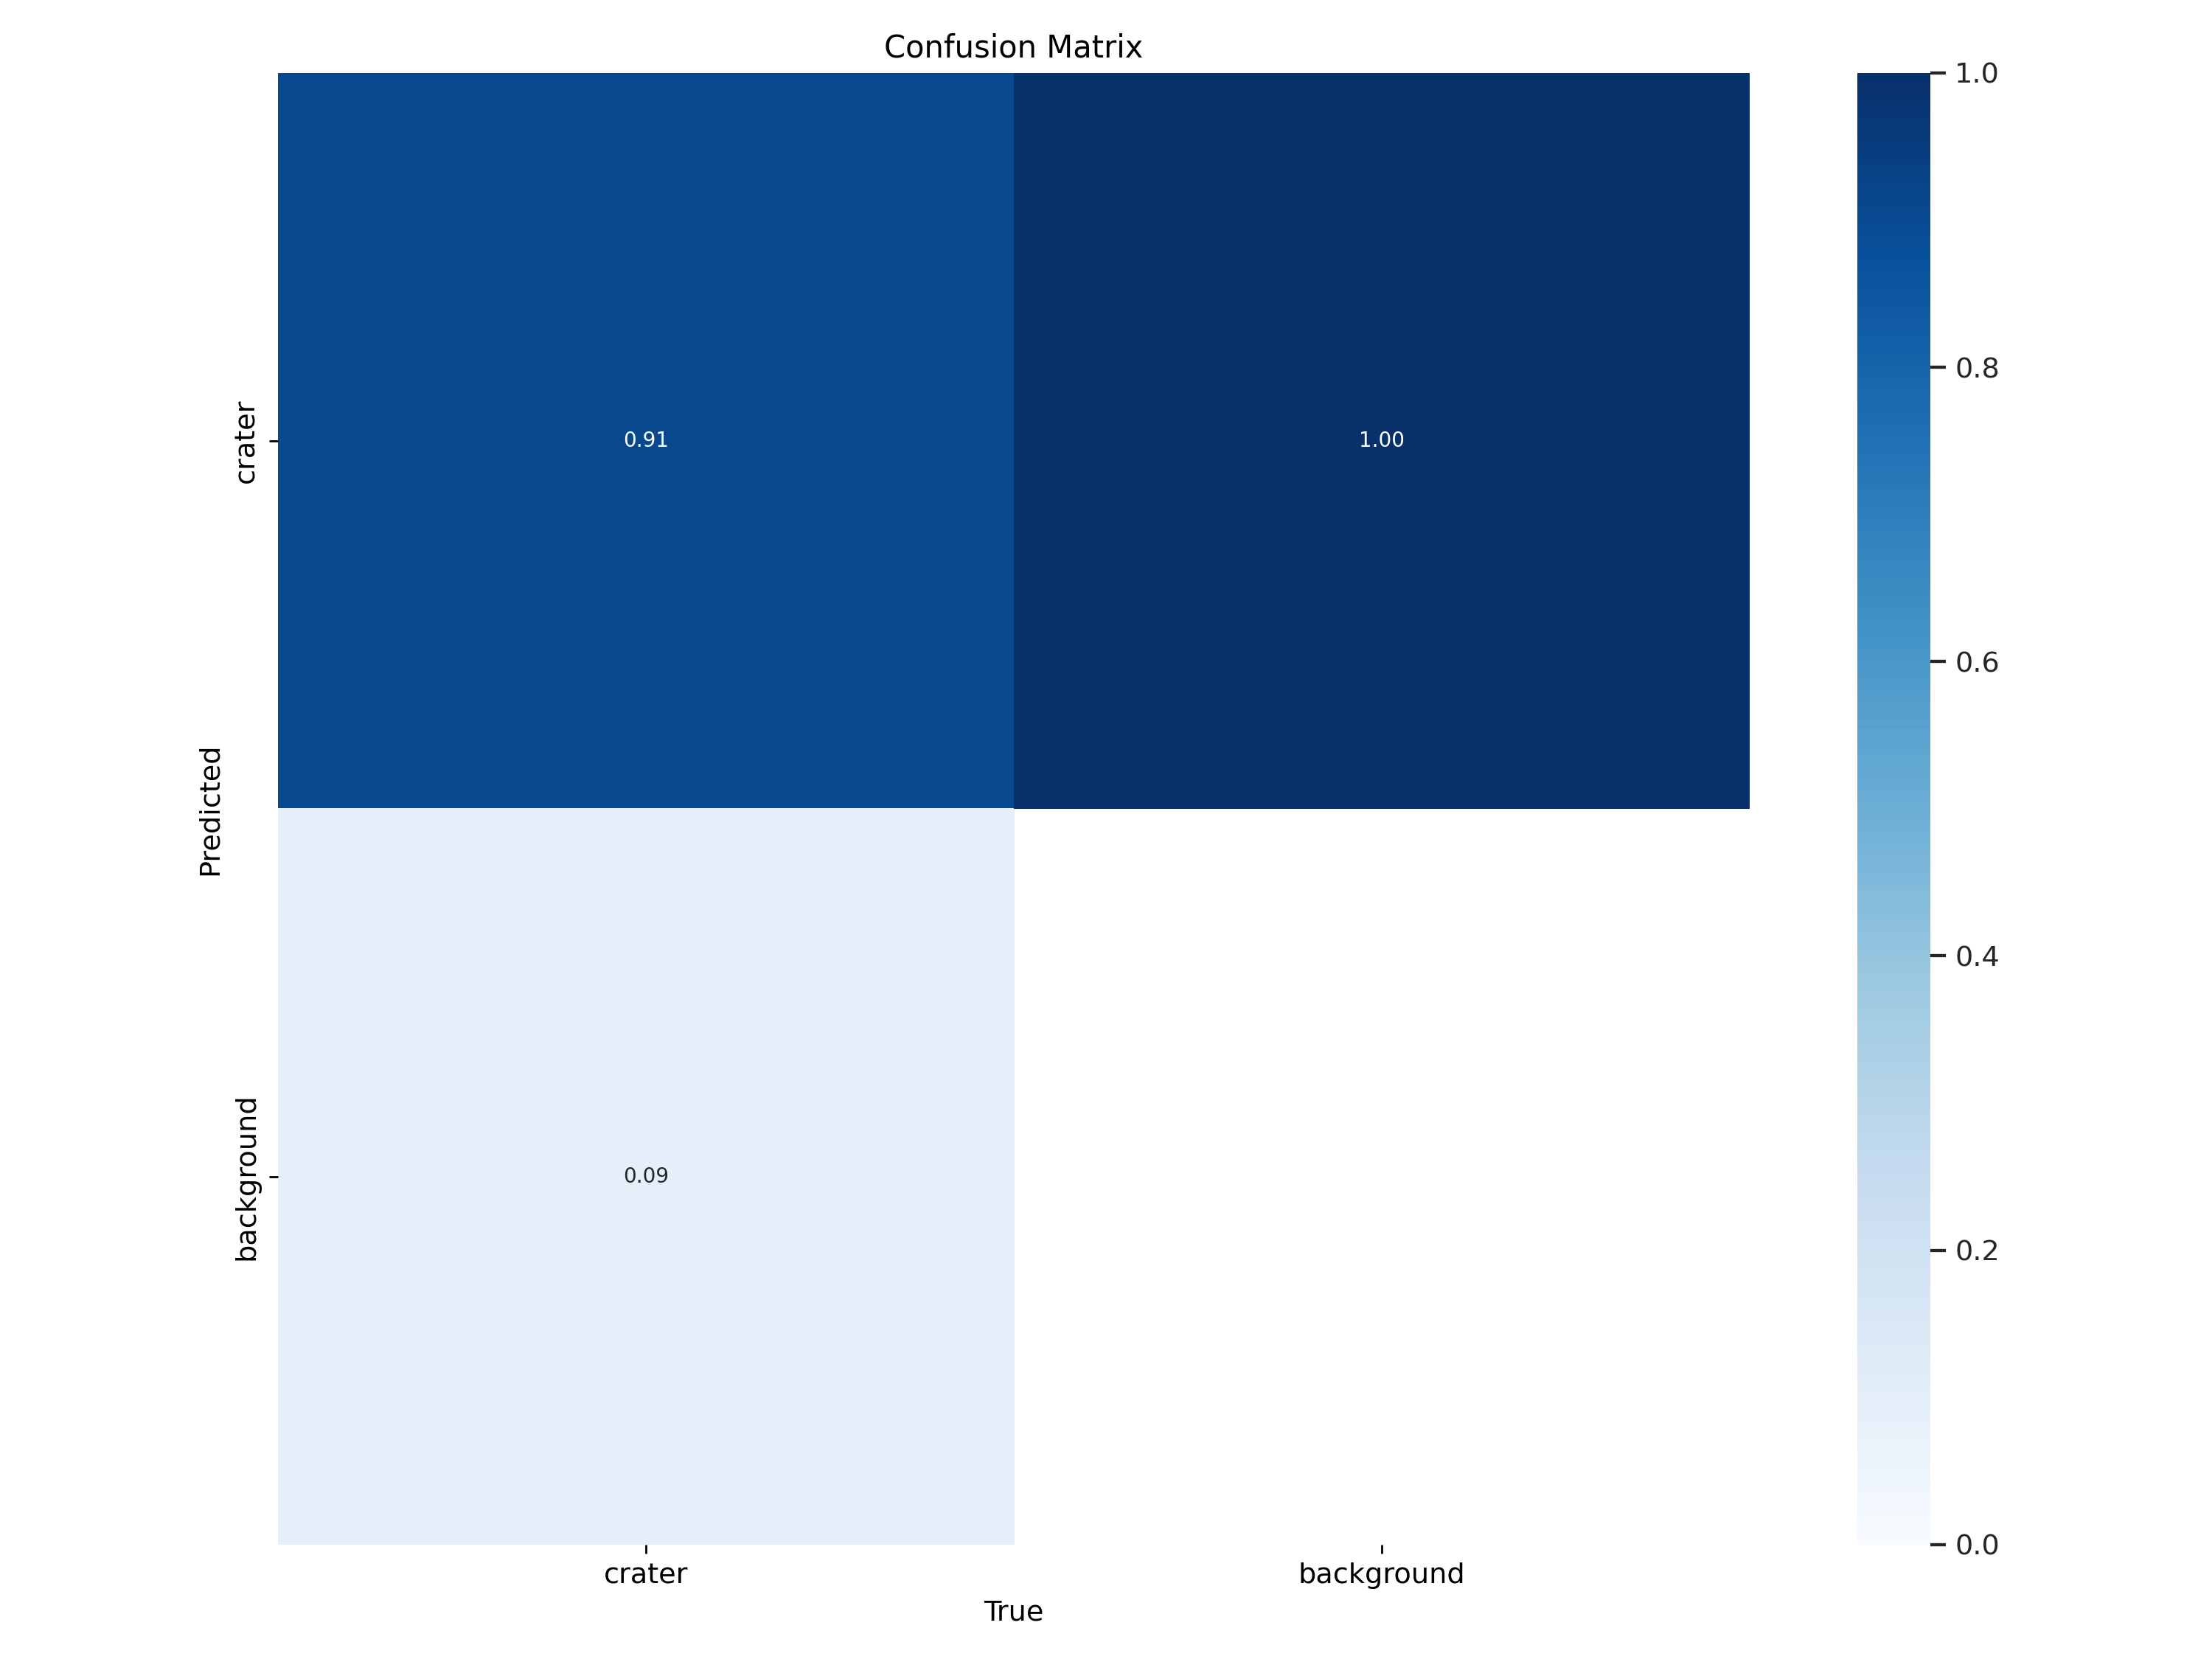

The model scores meet the requirements and can be used to detect craters on the Moon and Mars.